## EXPLORATORY DATA ANALYSIS
by Sania Kaleem

**Table of Contents**
1. [Basic Analysis](#1)
    * [Frequency](#2)
    * [Male vs Female](#MF)
    * [Top 30 Students](#T)
2. [Data Visualisation](#3)
    * [Count Plot](#4)
    * [Swarm Plot](#5)
    * [Scatter Plot and Hexbin Plot](#6)
    * [Pie Plot](#7)
    * [Histogram](#8)
    * [Heatmap](#9)

In [1]:
#importing all important packages
import numpy as np #linear algebra
import pandas as pd #data processing
import matplotlib.pyplot as plt #data visualisation
import seaborn as sns #data visualisation
%matplotlib inline

In [2]:
#input data
data = pd.read_csv('/content/StudentsPerformance.csv')
data.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [3]:
data.info() #checking data type for each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
data.shape

(1000, 8)

Our data has 8 columns and 1000 rows. Let's do some basic analysis.

<a id ="1"></a>
### Basic Analysis

In [5]:
data.describe() #starter code to find out some basic statistical insights

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Now, Let's check for any missing values

In [6]:
print(data.isna().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


There are no missing values in our data. So, we don't need to drop any values.

<a id = "2"></a>
#### Frequency
First, we look at the student's gender.

In [7]:
data['gender'].value_counts()

,count
gender,
female,518
male,482


more female than male in this data.

In [8]:
data.iloc[:,1].value_counts()

,count
race/ethnicity,
group C,319
group D,262
group B,190
group E,140
group A,89


As we can see, group C has the most members compared to the others

In [9]:
data.iloc[:,2].value_counts()

,count
parental level of education,
some college,226
associate's degree,222
high school,196
some high school,179
bachelor's degree,118
master's degree,59


In [10]:
data.iloc[:,3].value_counts()

,count
lunch,
standard,645
free/reduced,355


Many students have standard lunch.

In [11]:
data.iloc[:,4].value_counts()

,count
test preparation course,
none,642
completed,358


It seems that the total number of people who did not complete the course was double that of those who completed the course

<a id = "MF"></a>
#### Male vs Female
We will see who is better in math, reading, and writing.

In [12]:
male = data[data['gender'] == 'male']
female = data[data['gender'] != 'male']

print("Math Score")
print("Male    :",round(male['math score'].sum()/len(male),3))
print("Female  :",round(female['math score'].sum()/len(female),3),'\n')

print("Reading Score")
print("Male    :",round(male['reading score'].sum()/len(male),3))
print("Female  :",round(female['reading score'].sum()/len(female),3),'\n')

print("Writing Score")
print("Male    :",round(male['writing score'].sum()/len(male),3))
print("Female  :",round(female['writing score'].sum()/len(female),3))

Math Score
Male    : 68.728
Female  : 63.633 

Reading Score
Male    : 65.473
Female  : 72.608 

Writing Score
Male    : 63.311
Female  : 72.467


Male students are better in math. Female students are good in writing and reading.

<a id = "T"></a>
#### Top 30 Students
let's look at all the top 30 students who get very high scores

In [13]:
scores = pd.DataFrame(data['math score'] + data['reading score'] + data['writing score'], columns = ["total score"])
scores = pd.merge(data,scores, left_index = True, right_index = True).sort_values(by=['total score'],ascending=False)
scores.head(30)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
916,male,group E,bachelor's degree,standard,completed,100,100,100,300
962,female,group E,associate's degree,standard,none,100,100,100,300
458,female,group E,bachelor's degree,standard,none,100,100,100,300
114,female,group E,bachelor's degree,standard,completed,99,100,100,299
712,female,group D,some college,standard,none,98,100,99,297
179,female,group D,some high school,standard,completed,97,100,100,297
165,female,group C,bachelor's degree,standard,completed,96,100,100,296
625,male,group D,some college,standard,completed,100,97,99,296
685,female,group E,master's degree,standard,completed,94,99,100,293
903,female,group D,bachelor's degree,free/reduced,completed,93,100,100,293


It seems that there are 3 students who are geniuses here, they get perfect scores for all subjects. But, 2 of them didn't complete their test preparation course. Only 2 possibilities: **Genius** or **Cheating**.

From the data, we have seen that students with standard luch have better score than free/reduce lunch.

____________________________

<a id = "3"></a>
### Data Visualisation

And now we move to the important part where we will get informations from visualizing our data. First, we make count plots

<a id = "4"></a>
#### Count Plot

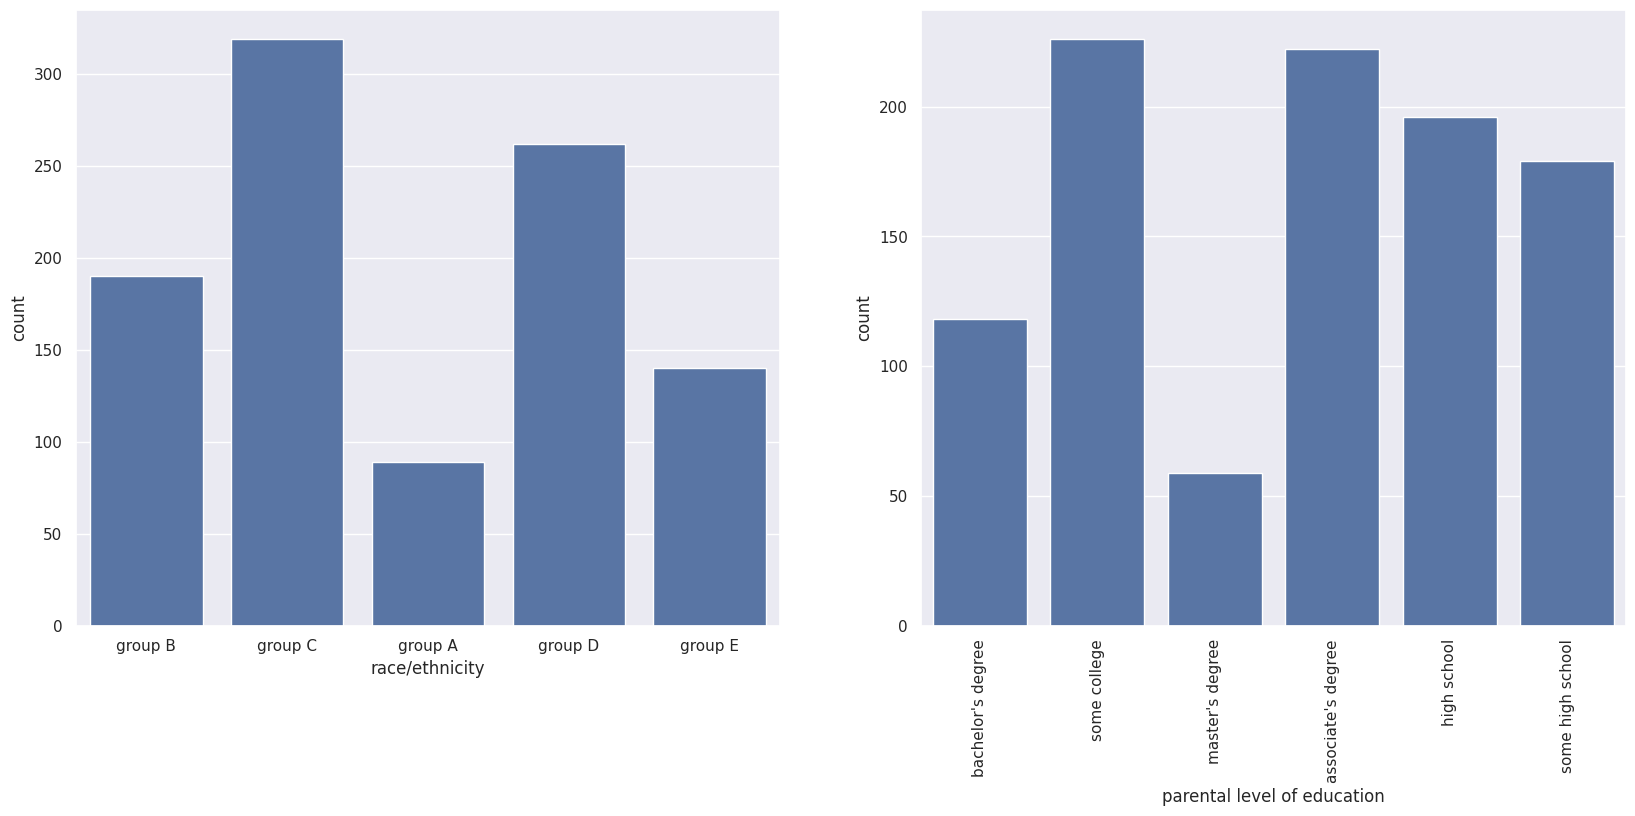

In [14]:
sns.set(style="darkgrid")
f, axs = plt.subplots(1,2, figsize = (20,8))

sns.countplot(x = 'race/ethnicity', data = data, ax = axs[0]) #race / ethnicity
sns.countplot(x = 'parental level of education', data = data, ax = axs[1]) #parental level of education

plt.xticks(rotation=90)

plt.show()

with count plot, we know the number of values for each element in our data. Let's see the data above by dividing it by gender.

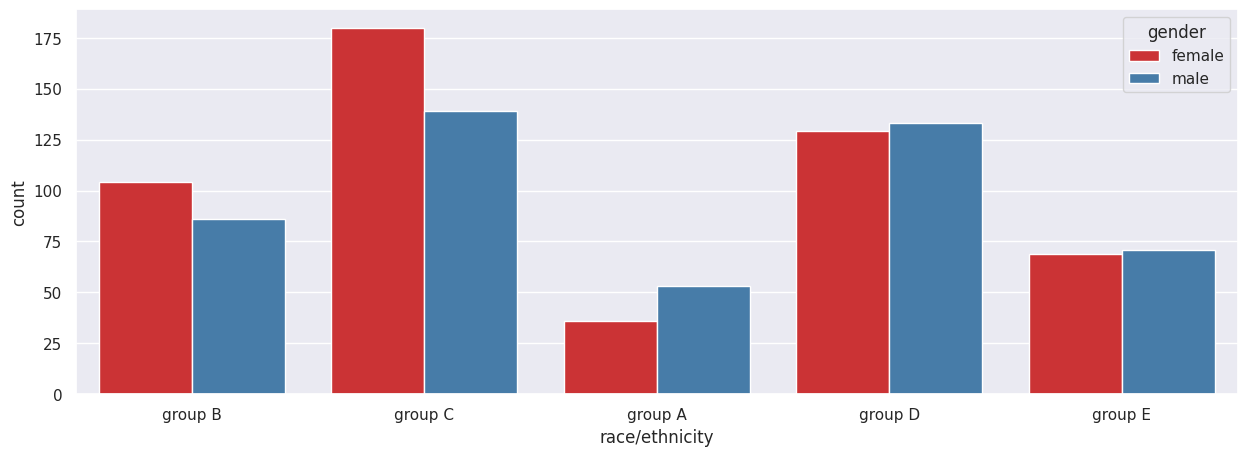

In [15]:
f, ax = plt.subplots(1,1, figsize = (15,5))

sns.countplot(x = 'race/ethnicity', data = data, hue = 'gender', palette = 'Set1') #race / ethnicity

plt.show()

What can we get from the information above? 3 out of 5 groups, have the most male. And we get some insights here:
* Group C has more differences in the number of male and female than the others
* The group with the least number of male is group A, and so are the female
* The group with the most number of female is group C, and so are the male
<br>
<br>
<br>
How about their lunch?

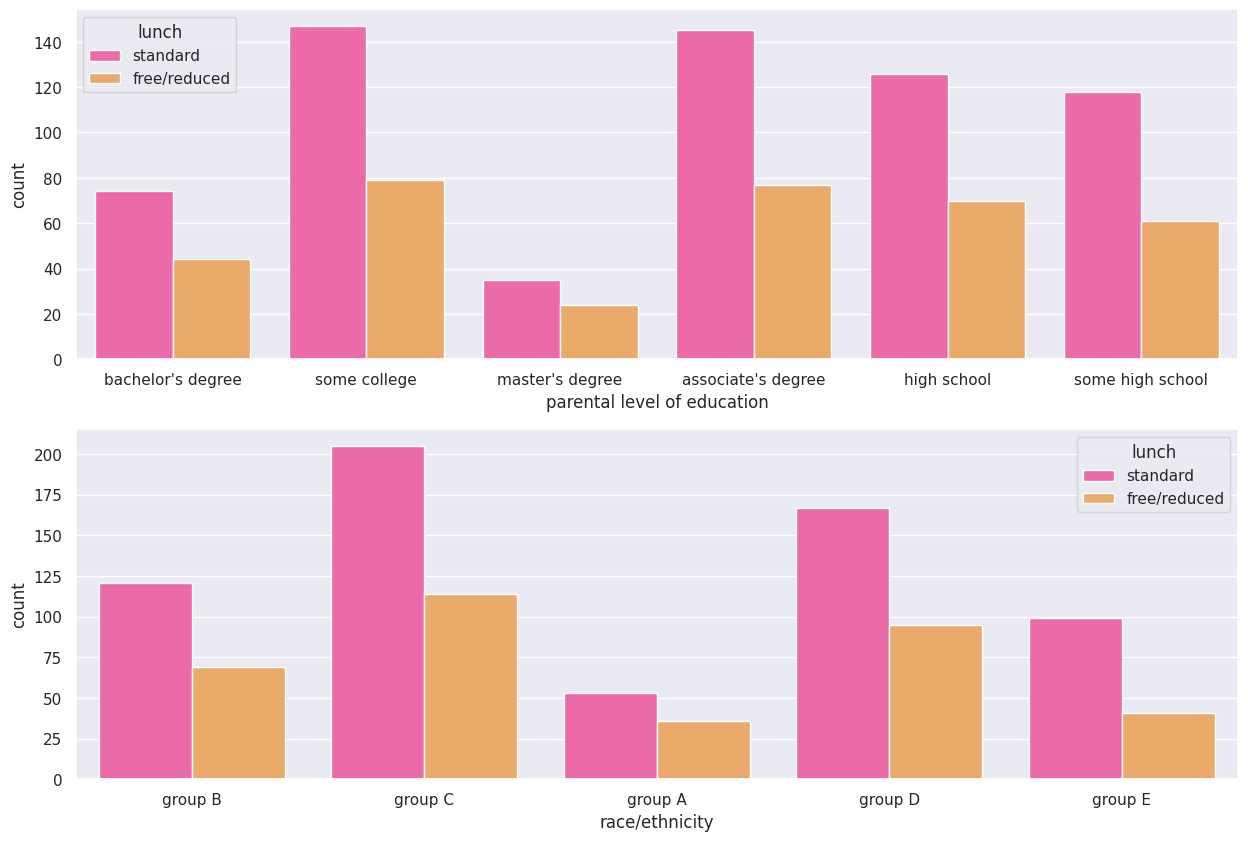

In [16]:
f, axs = plt.subplots(2,1, figsize = (15,10))

sns.countplot(x = 'parental level of education', data = data, hue = 'lunch', ax = axs[0], palette = 'spring')
sns.countplot(x = 'race/ethnicity', data = data, hue = 'lunch', ax = axs[1] , palette = 'spring')

plt.show()

standard lunches are the majority for each level of education, and so are groups.

<a id = "5"></a>
#### Swarm Plot
We'll use Swarm plot in our ratio data: Math score, writing score, and reading score. It draw a categorical scatterplot with non-overlapping points..

<ipython-input-17-a23304913089>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.swarmplot(x = 'math score', y='gender', data = data, palette = 'Set1') #math score


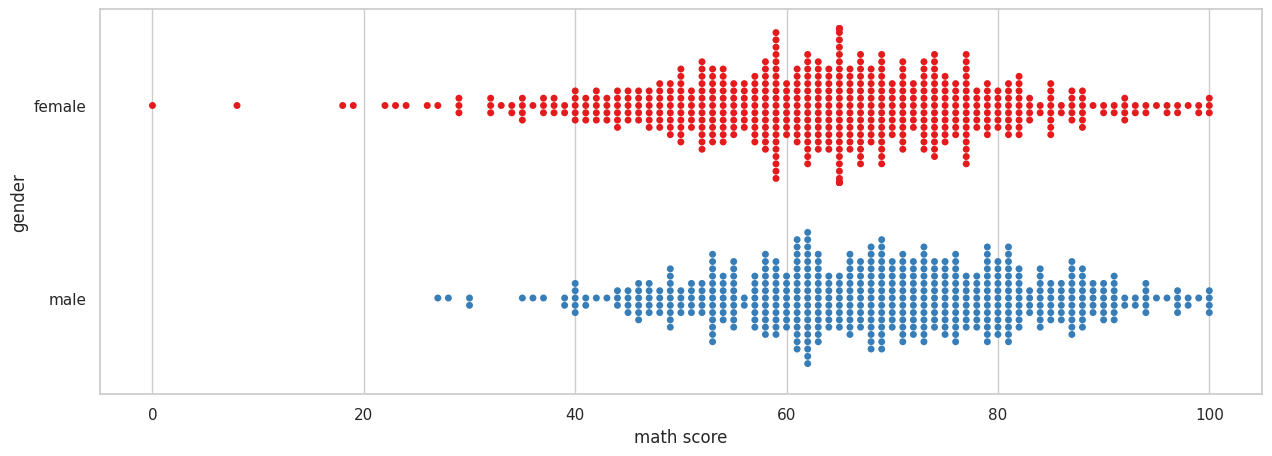

<ipython-input-17-a23304913089>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.swarmplot(x = 'reading score', y='gender', data = data, palette = 'Set1') #reading score


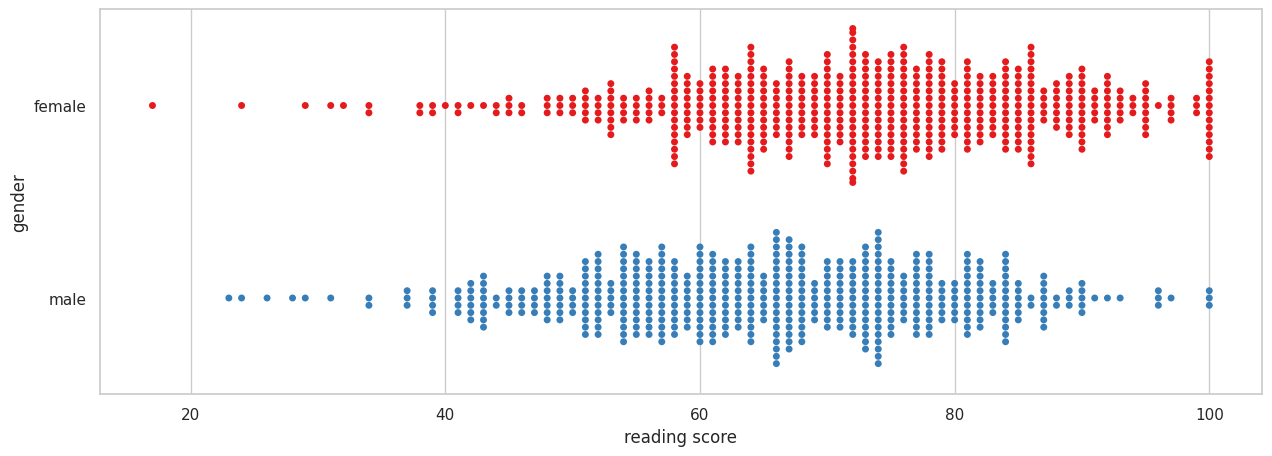

<ipython-input-17-a23304913089>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.swarmplot(x = 'writing score', y='gender', data = data, palette = 'Set1') #writing score


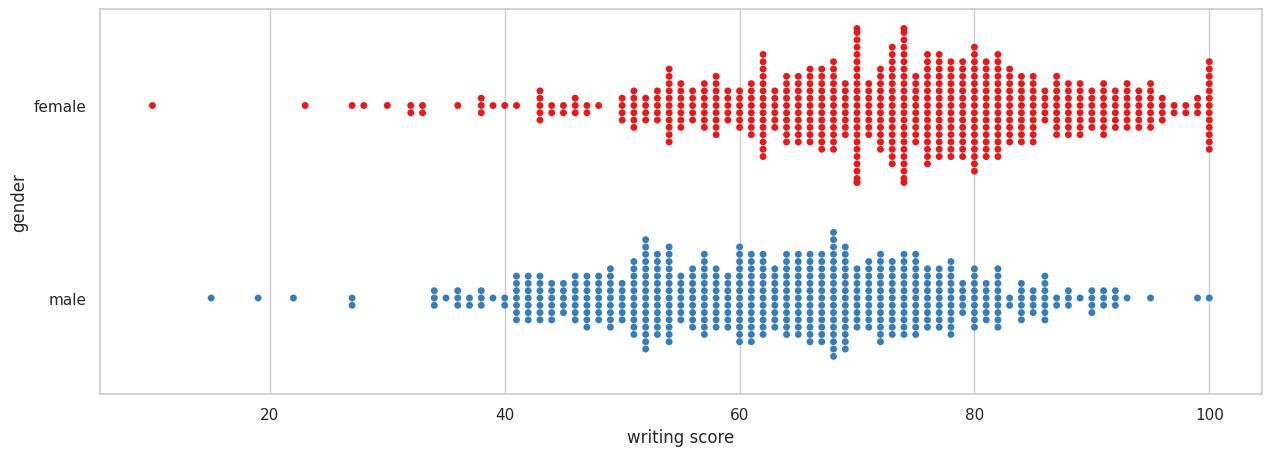

In [17]:
sns.set_style('whitegrid')

f, ax = plt.subplots(1,1,figsize= (15,5))
ax = sns.swarmplot(x = 'math score', y='gender', data = data, palette = 'Set1') #math score
plt.show()

f, ax = plt.subplots(1,1,figsize= (15,5))
ax = sns.swarmplot(x = 'reading score', y='gender', data = data, palette = 'Set1') #reading score
plt.show()

f, ax = plt.subplots(1,1,figsize= (15,5))
ax = sns.swarmplot(x = 'writing score', y='gender', data = data, palette = 'Set1') #writing score
plt.show()



As we can see, we get some information:
* The majority of students have grades in the range 60-80
* In all subjects, the lowest value is held by female
* Female who get perfect score in writing and reading more than male

<a id = "6"></a>
#### Scatter Plot and Hexbin Plot
The most familiar way to visualize a bivariate distribution is a scatterplot, where each observation is shown with point at the x and y values. We can draw a scatterplot with the matplotlib *plt.scatter* function, and it is also the default kind of plot shown by the **jointplot()** function.

Hexbin plot shows the counts of observations that fall within hexagonal bins. This plot works best with relatively large datasets.

First, we enter math score as x-axis and writing score as y-axis.

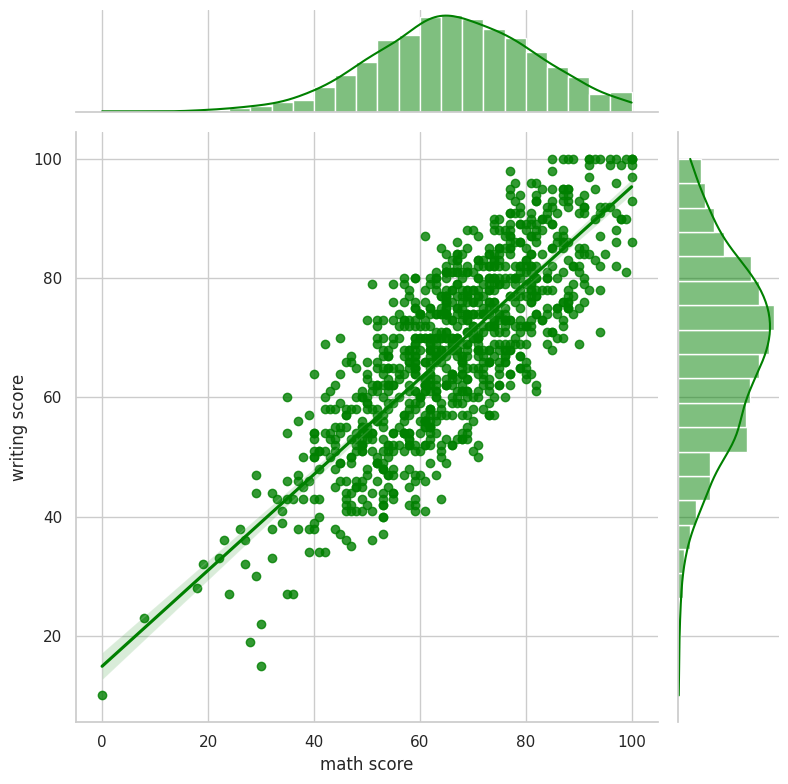

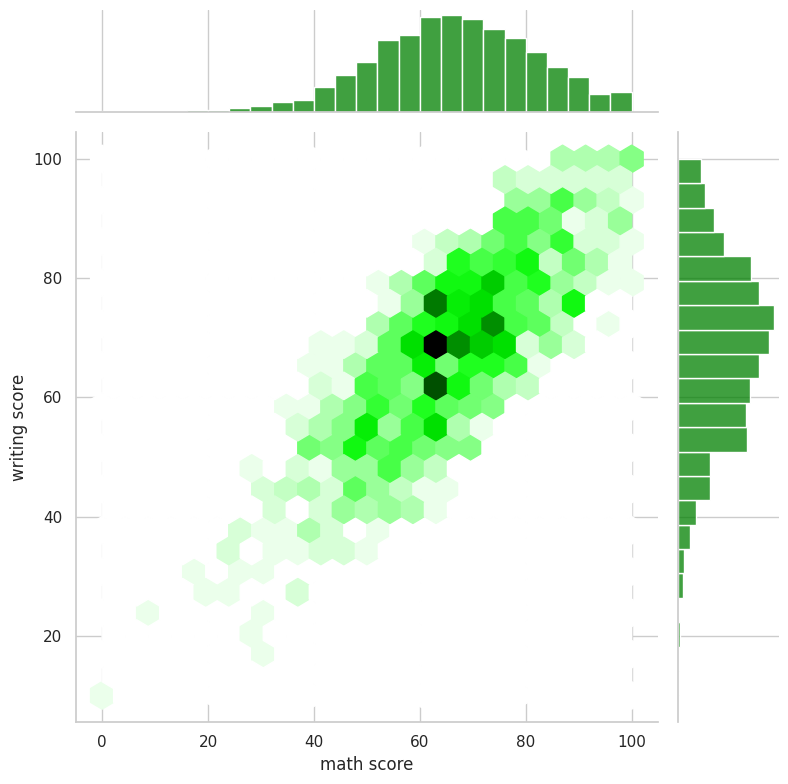

In [18]:
sns.jointplot(x ='math score', y = 'writing score', data = data, color = 'green', height = 8, kind = 'reg')
sns.jointplot(x ='math score', y = 'writing score', data = data, color = 'green', height = 8, kind = 'hex')

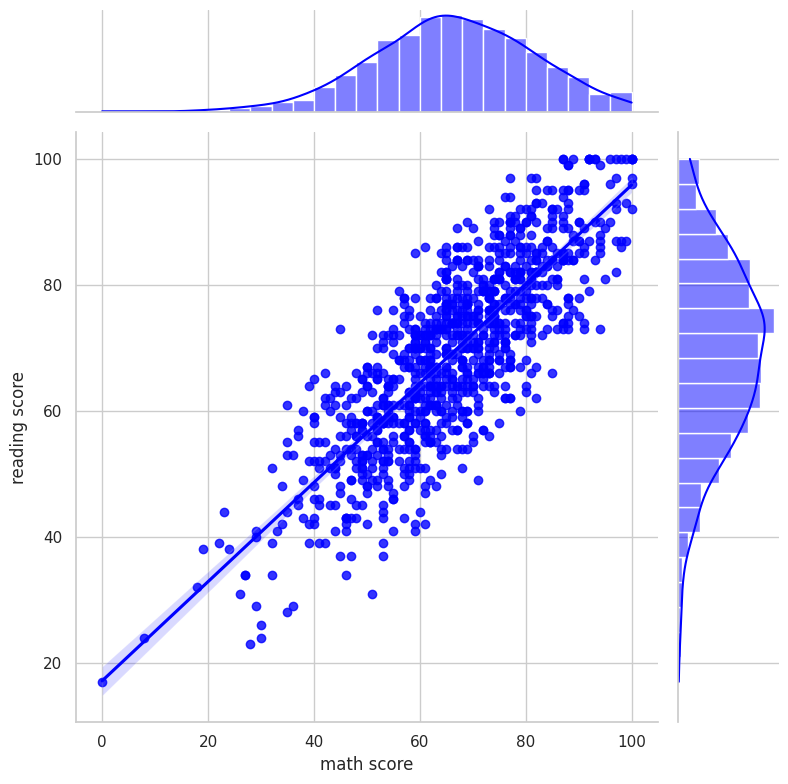

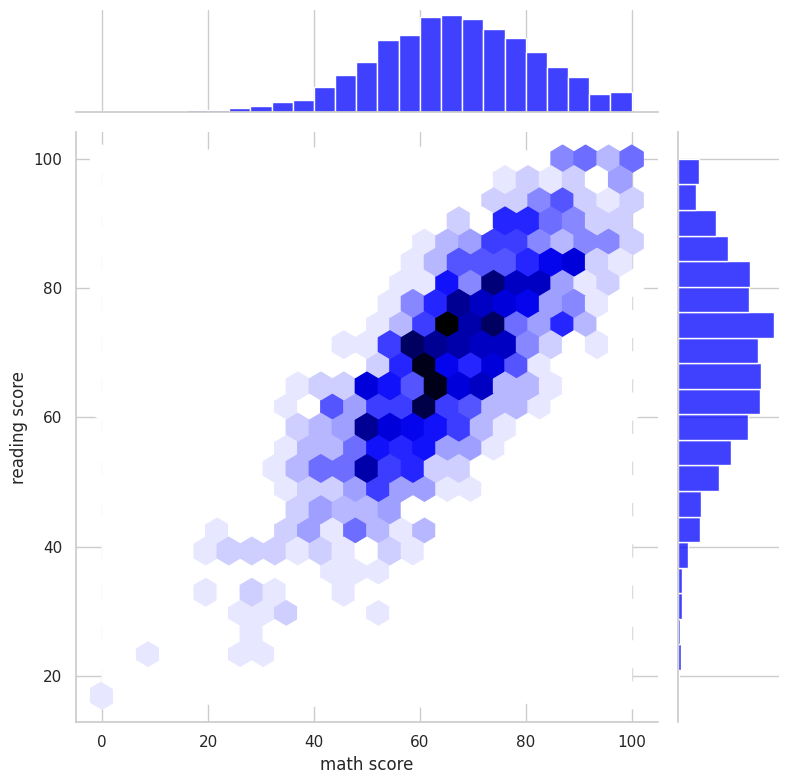

In [19]:
sns.jointplot(x ='math score', y = 'reading score', data = data, color = 'blue', height = 8, kind = 'reg')
sns.jointplot(x ='math score', y = 'reading score', data = data, color = 'blue', height = 8, kind = 'hex')

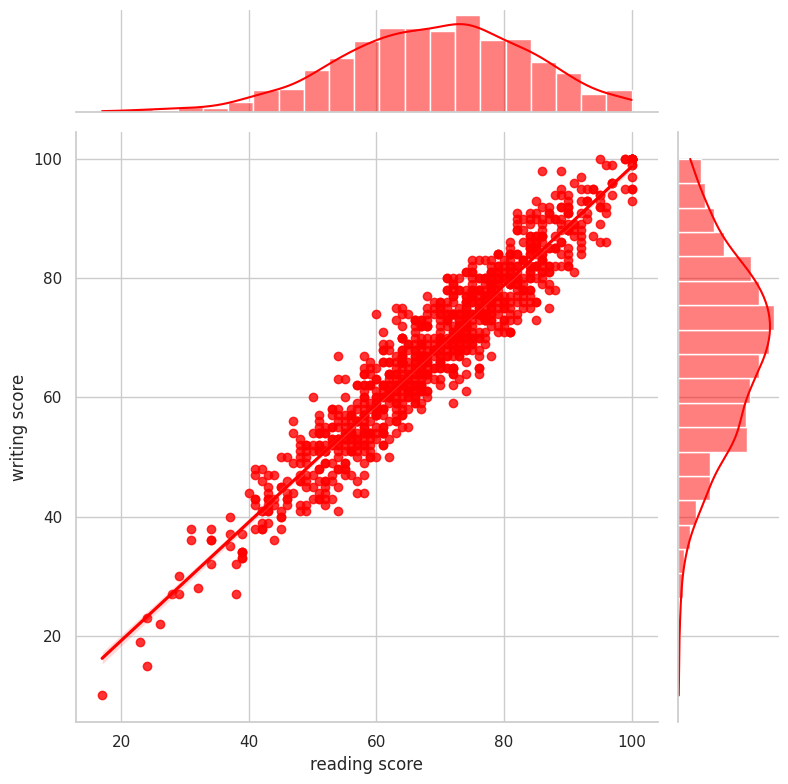

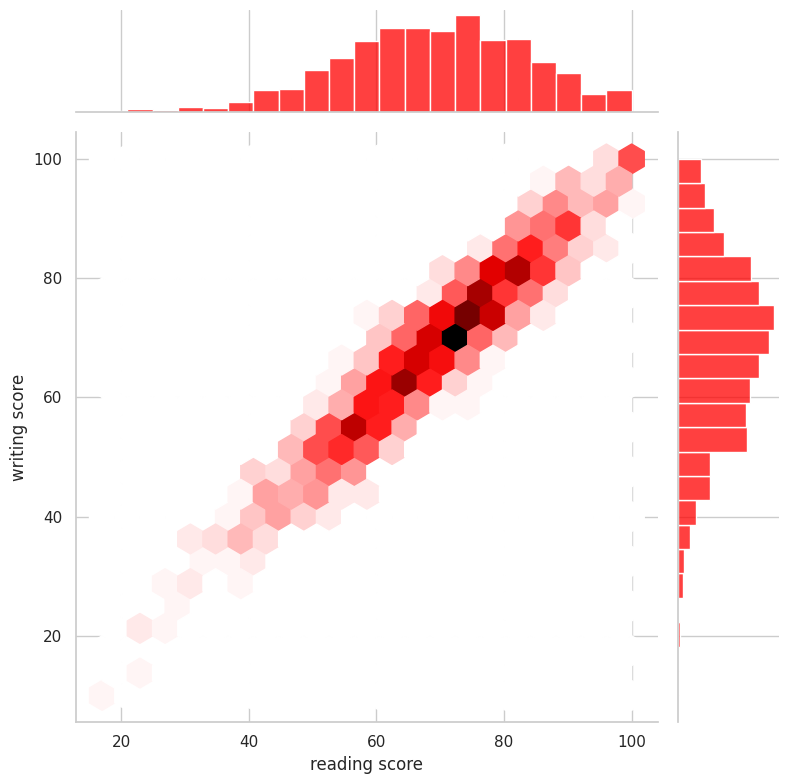

In [20]:
sns.jointplot(x ='reading score', y = 'writing score', data = data, color = 'red', height = 8, kind = 'reg')
sns.jointplot(x ='reading score', y = 'writing score', data = data, color = 'red', height = 8, kind = 'hex')

It seems like all students have a balanced skill between writing and reading.

<a id = "7"></a>
#### Pie Plot
Let's assume if there are students who score < 60, then we determine they did not pass the exam.

In [21]:
#math score
passed = len(data[data['math score'] >= 60])
not_passed = 1000 - passed

percentage1 = [passed, not_passed]

#reading score
passed = len(data[data['reading score'] >= 60])
not_passed = 1000 - passed

percentage2 = [passed, not_passed]

#writing score
passed = len(data[data['writing score'] >= 60])
not_passed = 1000 - passed

percentage3 = [passed, not_passed]

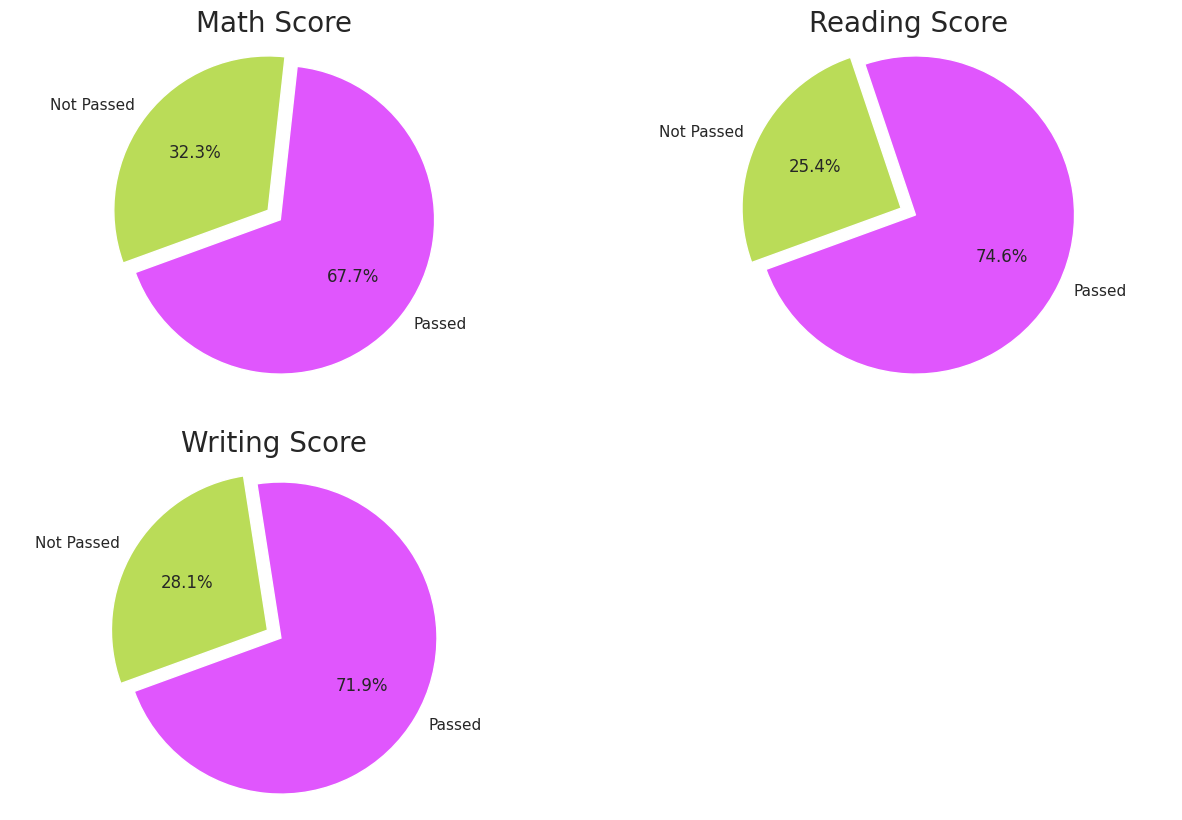

In [22]:
labels = "Passed", "Not Passed"

f, axs = plt.subplots(2,2, figsize=(15,10))

#Math Score
axs[0,0].pie(percentage1, labels = labels, explode=(0.05,0.05), autopct = '%1.1f%%', startangle = 200, colors = ["#e056fd", "#badc58"])
axs[0,0].set_title("Math Score", size = 20)
axs[0,0].axis('equal')

#Reading Score
axs[0,1].pie(percentage2, labels = labels, explode=(0.05,0.05), autopct = '%1.1f%%', startangle = 200, colors = ["#e056fd", "#badc58"])
axs[0,1].set_title("Reading Score", size = 20)
axs[0,1].axis('equal')

#Writing Score
axs[1,0].pie(percentage3, labels = labels, explode=(0.05,0.05), autopct = '%1.1f%%', startangle = 200, colors = ["#e056fd", "#badc58"])
axs[1,0].set_title("Writing Score", size = 20)
axs[1,0].axis('equal')

f.delaxes(axs[1,1]) #deleting axs[1,1] so it will be white blank

plt.show()

We get some information:
* 323 students didn't pass Math exam
* 254 students didn't pass Reading exam
* 281 students didn't pass Writing exam

<a id = "8"></a>
#### Histogram
A histogram represents the distribution of data by forming bins along the range of the data and then drawing bars to show the number of observations that fall in each bin.

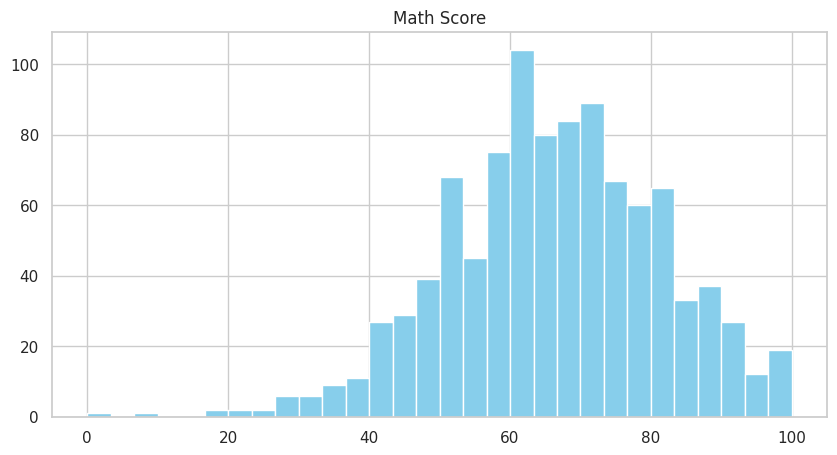

In [23]:
f, ax = plt.subplots(1,1,figsize=(10,5))

plt.hist(data['math score'], 30, color = 'skyblue')
ax.set(title = "Math Score")

plt.show()

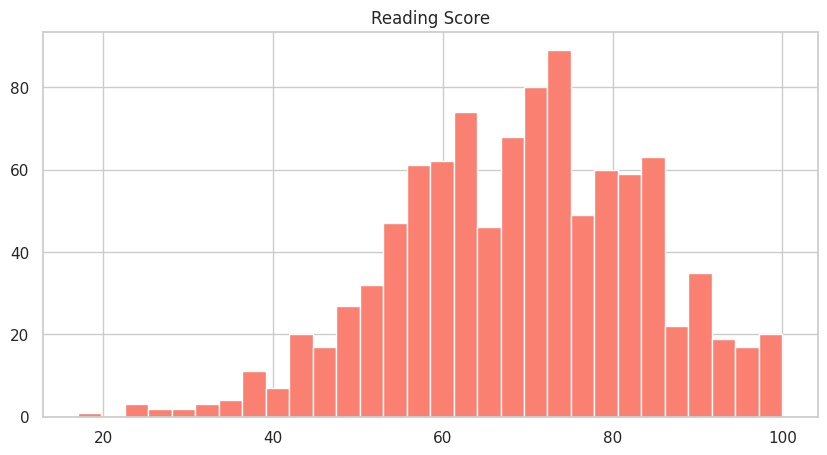

In [24]:
f, ax = plt.subplots(1,1,figsize=(10,5))

plt.hist(data['reading score'], 30, color = 'salmon')
ax.set(title = "Reading Score")

plt.show()

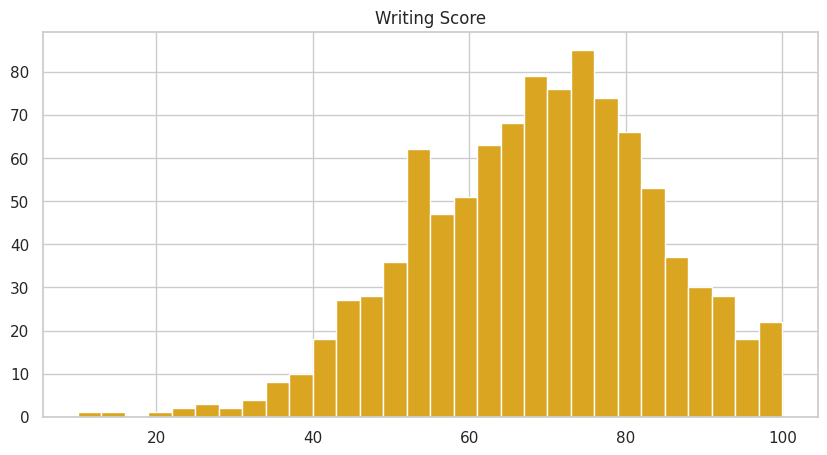

In [25]:
f, ax = plt.subplots(1,1,figsize=(10,5))

plt.hist(data['writing score'], 30, color = 'goldenrod') #visit https://xkcd.com/color/rgb/ if you want to see more colors
ax.set(title = "Writing Score")

plt.show()

From these plots, It seems students performance in exam is around 60-80.

<a id = "9"></a>
#### Heat Map
Heat map is useful if you want to see any correlations between attributes. We'll see correlations between math, reading, and writing score.

In [26]:
sns.heatmap(data.corr(), annot= True, cmap = 'autumn') #data.corr() used to make correlation matrix

plt.show()

ValueError: could not convert string to float: 'female'

As you can see, writing score and reading score have a strong correlation. This means that if students have good reading skill, it'll affect their writing skill. The lowest correlation is writing score and math score. This pretty makes sense because if you're good at math, it doesn't mean you're good at writing.